In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, LinearLocator
import seaborn as sns
import numpy as np

In [2]:
# Daten laden
def load_data():
    """
    Lädt die Daten aus einer externen CSV-Datei von GitHub und gibt einen DataFrame zurück.
    
    Returns:
        pd.DataFrame: DataFrame mit den geladenen Daten
    """
    url = "https://raw.githubusercontent.com/AutoCodeWizard/Autoscout24_Germany_demoproject/3febc23de7b156ca8f7a328029cef644bb06c73a/autoscout24.csv"
    df = pd.read_csv(url)
    return df

df = load_data()
df.tail()

,mileage,make,model,fuel,gear,offerType,price,hp,year
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46404,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [3]:
def clean_data(df):
    """
    Reinigt den DataFrame und bereitet ihn für die Analyse vor.

    Args:
        df (pd.DataFrame): Ursprünglicher DataFrame

    Returns:
        pd.DataFrame: Bereinigter DataFrame
    """

    # Zeilen mit fehlenden oder null Werten entfernen
    df = df.dropna().reset_index(drop=True)

    # Ungültige Zeilen aus der Spalte 'hp' entfernen
    df = df[df['hp'] != 'null']

    # Den Datentyp der Spalte 'hp' in int ändern
    df['hp'] = df['hp'].astype(int)

    # Zeilen mit ungewöhnlich hohen oder niedrigen Werten entfernen
    df = df[(df['mileage'] > 0) & (df['mileage'] < 2000000)]
    df = df[(df['price'] > 100) & (df['price'] < 3000000)]
    df = df[(df['hp'] > 1) & (df['hp'] < 3000)]

    return df

df = clean_data(df)
df.describe()

,mileage,price,hp,year
count,4.600400e+04,4.600400e+04,46004.000000,46004.000000
mean,7.133325e+04,1.655786e+04,133.020411,2016.005478
std,6.243965e+04,1.928902e+04,75.103981,3.152641
min,1.000000e+00,1.100000e+03,5.000000,2011.000000
25%,1.999000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050992e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [4]:
df.tail()

,mileage,make,model,fuel,gear,offerType,price,hp,year
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71,2021
46070,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71,2021


c:\Users\lukas\Projekte\DataSience\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lukas\Projekte\DataSience\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lukas\Projekte\DataSience\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lukas\Projekte\DataSience\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

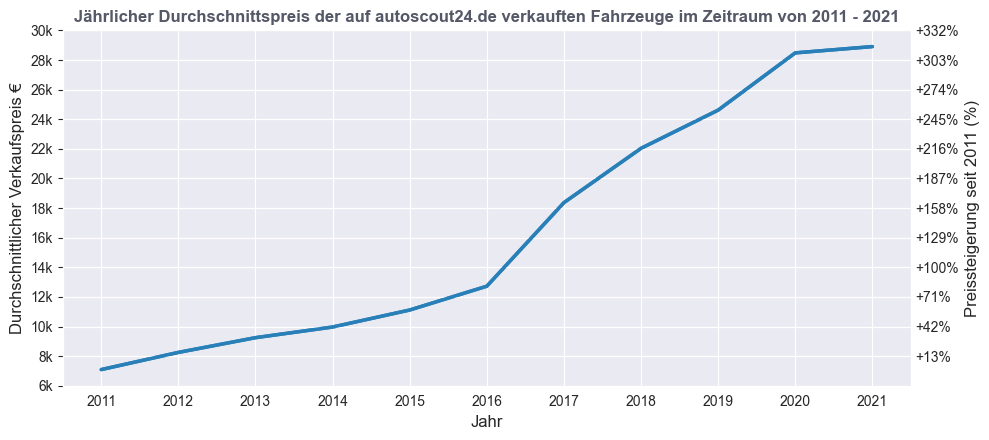

In [5]:
def plot_avg_car_price(df):
    """
    Erstellt einen Plot, der die durchschnittlichen Verkaufspreise von Autos sowie deren Preissteigerung über die Jahre darstellt.

    Args:
        df (pandas.DataFrame): Dataframe, das die Autodaten enthält. Es muss eine Spalte 'year' und eine Spalte 'price' geben.

    Returns:
        None: Die Funktion gibt nichts zurück, aber sie zeigt ein Plot an.
    """
    sns.set_style("darkgrid")

    # Daten aufbereiten
    avg_price_per_year = df.groupby('year')['price'].mean()
    price_increase_percent = (avg_price_per_year / avg_price_per_year.loc[2011] - 1) * 100
    
    def plus_percent(x, pos):
        """
        Hilfsfunktion für die % Formatierung der y-Achse.
        """
        return f"+{int(x)}%"
    
    def hide_lowest_tick(ax):
        """
        Versteckt die Beschriftung des niedrigsten Ticks auf der y-Achse.
        """
        yticks = ax.yaxis.get_major_ticks()
        if yticks:
            yticks[0].label2.set_visible(False)

    def thousands(x, pos):
        """
        Hilfsfunktion für die Tausenderformatierung der y-Achse.
        """
        return '%1.0fk' % (x * 1e-3)
    
    # Plot erstellen
    fig, ax = plt.subplots(figsize=(10, 4.5))
    sns.lineplot(x=avg_price_per_year.index,
                 y=avg_price_per_year.values, 
                 ax=ax, color='#2980b9', 
                 linewidth=2.5)
    ax.set_title('Jährlicher Durchschnittspreis der auf autoscout24.de verkauften Fahrzeuge im Zeitraum von 2011 - 2021', 
                color='#555867', fontsize=12, fontweight='bold')
    ax.set_xlabel('Jahr', fontsize=12)
    ax.set_ylabel('Durchschnittlicher Verkaufspreis €', fontsize=12)
    ax.set_xticks(range(min(avg_price_per_year.index), max(avg_price_per_year.index) + 1))
    formatter = FuncFormatter(thousands)
    ax.yaxis.set_major_formatter(formatter)
    axes2 = ax.twinx()
    sns.lineplot(x=price_increase_percent.index,
                 y=price_increase_percent.values, 
                 ax=axes2, color='#2980b9', 
                 linewidth=2.5)
    axes2.set_ylabel('Preissteigerung seit 2011 (%)', fontsize=12)
    axes2.yaxis.set_major_formatter(FuncFormatter(plus_percent))
    axes2.tick_params(axis='y', which='both', length=0)
    ax.yaxis.set_major_locator(LinearLocator(13))
    axes2.yaxis.set_major_locator(LinearLocator(13))
    hide_lowest_tick(axes2)
    initial_avg_price = avg_price_per_year.loc[2011]
    # Linien für die Preissteigerung hinzufügen
    #colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    #for i, factor in enumerate([2, 3, 4]):
    #    y_value = initial_avg_price * factor
    #    color = colors[i]
    #    ax.axhline(y=y_value, color=color, linestyle='--')
    #    ax.text(min(avg_price_per_year.index),
    #             y_value, 
    #             f"{factor}x des Preises von 2011", 
    #             verticalalignment='bottom', 
    #             horizontalalignment='left', 
    #             color=color, fontsize=12)
    #    x_values = np.array(avg_price_per_year.index)
    #    y_values = np.array(avg_price_per_year.values)
    #    intersections = find_intersections(x_values, y_values, y_value)
    #    for intersect in intersections:
    #        ax.axvline(x=intersect, 
    #                   ymin=0, 
    #                   ymax=(y_value - ax.get_ylim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0]), 
    #                   linestyle='--', color=color)
    plt.tight_layout()
    #st.pyplot(fig)  # Figur an st.pyplot übergeben
    plt.show()

plot_avg_car_price(df)

c:\Users\lukas\Projekte\DataSience\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lukas\Projekte\DataSience\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lukas\Projekte\DataSience\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lukas\Projekte\DataSience\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

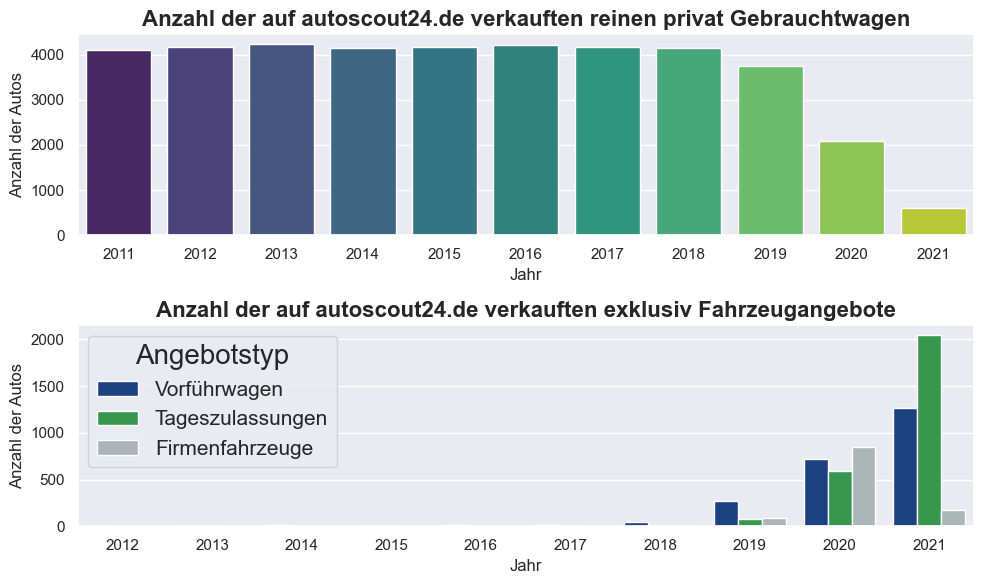

In [9]:
def plot_car_data(df):
    # Erstellung eines DataFrame für Gebrauchtwagen
    used_cars_df = df[df['offerType'] == 'Used']
    num_used_cars_per_year = used_cars_df.groupby('year').size()

    # Erstellung eines DataFrame für restliche offerTypes
    filtered_offer_types = ['Demonstration', "Employee's car", 'Pre-registered', 'New']
    filtered_df = df[df['offerType'].isin(filtered_offer_types)]
    translation_dict = {
        'Demonstration': 'Vorführwagen',
        "Employee's car": 'Firmenfahrzeuge',
        'Pre-registered': 'Tageszulassungen',
        #'New': 'Neuwagen'
    }
    filtered_df.loc[:, 'offerType'] = filtered_df['offerType'].map(translation_dict)
    num_cars_per_year_offerType_filtered = filtered_df.groupby(['year', 'offerType']).size().reset_index(name='count')

    # Erstellung der Subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    # Plot für die Anzahl der verkauften Gebrauchtwagen pro Jahr
    sns.barplot(x=num_used_cars_per_year.index, y=num_used_cars_per_year.values, ax=axs[0], palette='viridis')
    axs[0].set_title("Anzahl der auf autoscout24.de verkauften reinen privat Gebrauchtwagen", fontsize=16, fontweight='bold')
    axs[0].set_xlabel("Jahr", fontsize=12)
    axs[0].set_ylabel("Anzahl der Autos", fontsize=12)

    # Plot für die Anzahl der verkauften Exklusiv Fahrzeugangebote pro Jahr
    custom_palette = ['#0B3D91', '#28A745', '#AAB7B8', '#D35400']
    sns.barplot(x='year', y='count', hue='offerType', data=num_cars_per_year_offerType_filtered, ax=axs[1], palette=custom_palette)
    axs[1].set_title("Anzahl der auf autoscout24.de verkauften exklusiv Fahrzeugangebote", fontsize=16, fontweight='bold')
    axs[1].set_xlabel("Jahr", fontsize=12)
    axs[1].set_ylabel("Anzahl der Autos", fontsize=12)
    axs[1].legend(title='Angebotstyp', title_fontsize='20', loc='upper left', fontsize='15')

    plt.tight_layout()
    #st.pyplot(fig)  # Figur an st.pyplot übergeben
    plt.show()

plot_car_data(df)

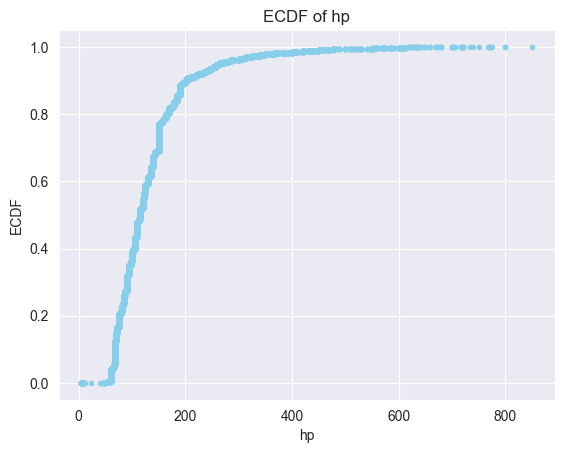

In [7]:
def plot_ecdf(data, feature, color='skyblue'): 
        """
        Plottet die empirische kumulative Verteilungsfunktion (ECDF) für ein gegebenes Feature.
        
        Args:
            data (pd.DataFrame): Der Datensatz, der das Feature enthält.
            feature (str): Der Name des Features, für das die ECDF geplottet werden soll.
            color (str): Die Farbe des ECDF-Plots.
        
        Returns:
            None
        """
        # Daten für das Feature sortieren
        x = np.sort(data[feature])
        # ECDF-Werte berechnen
        y = np.arange(1, len(x) + 1) / len(x)
        # ECDF plotten
        plt.plot(x, y, marker='.', linestyle='none', color=color)
        plt.title(f'ECDF of {feature}')
        plt.xlabel(feature)
        plt.ylabel('ECDF')
        plt.show()

plot_ecdf(df, 'hp')

c:\Users\lukas\Projekte\DataSience\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lukas\Projekte\DataSience\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lukas\Projekte\DataSience\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\lukas\Projekte\DataSience\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

<Figure size 2000x1500 with 0 Axes>

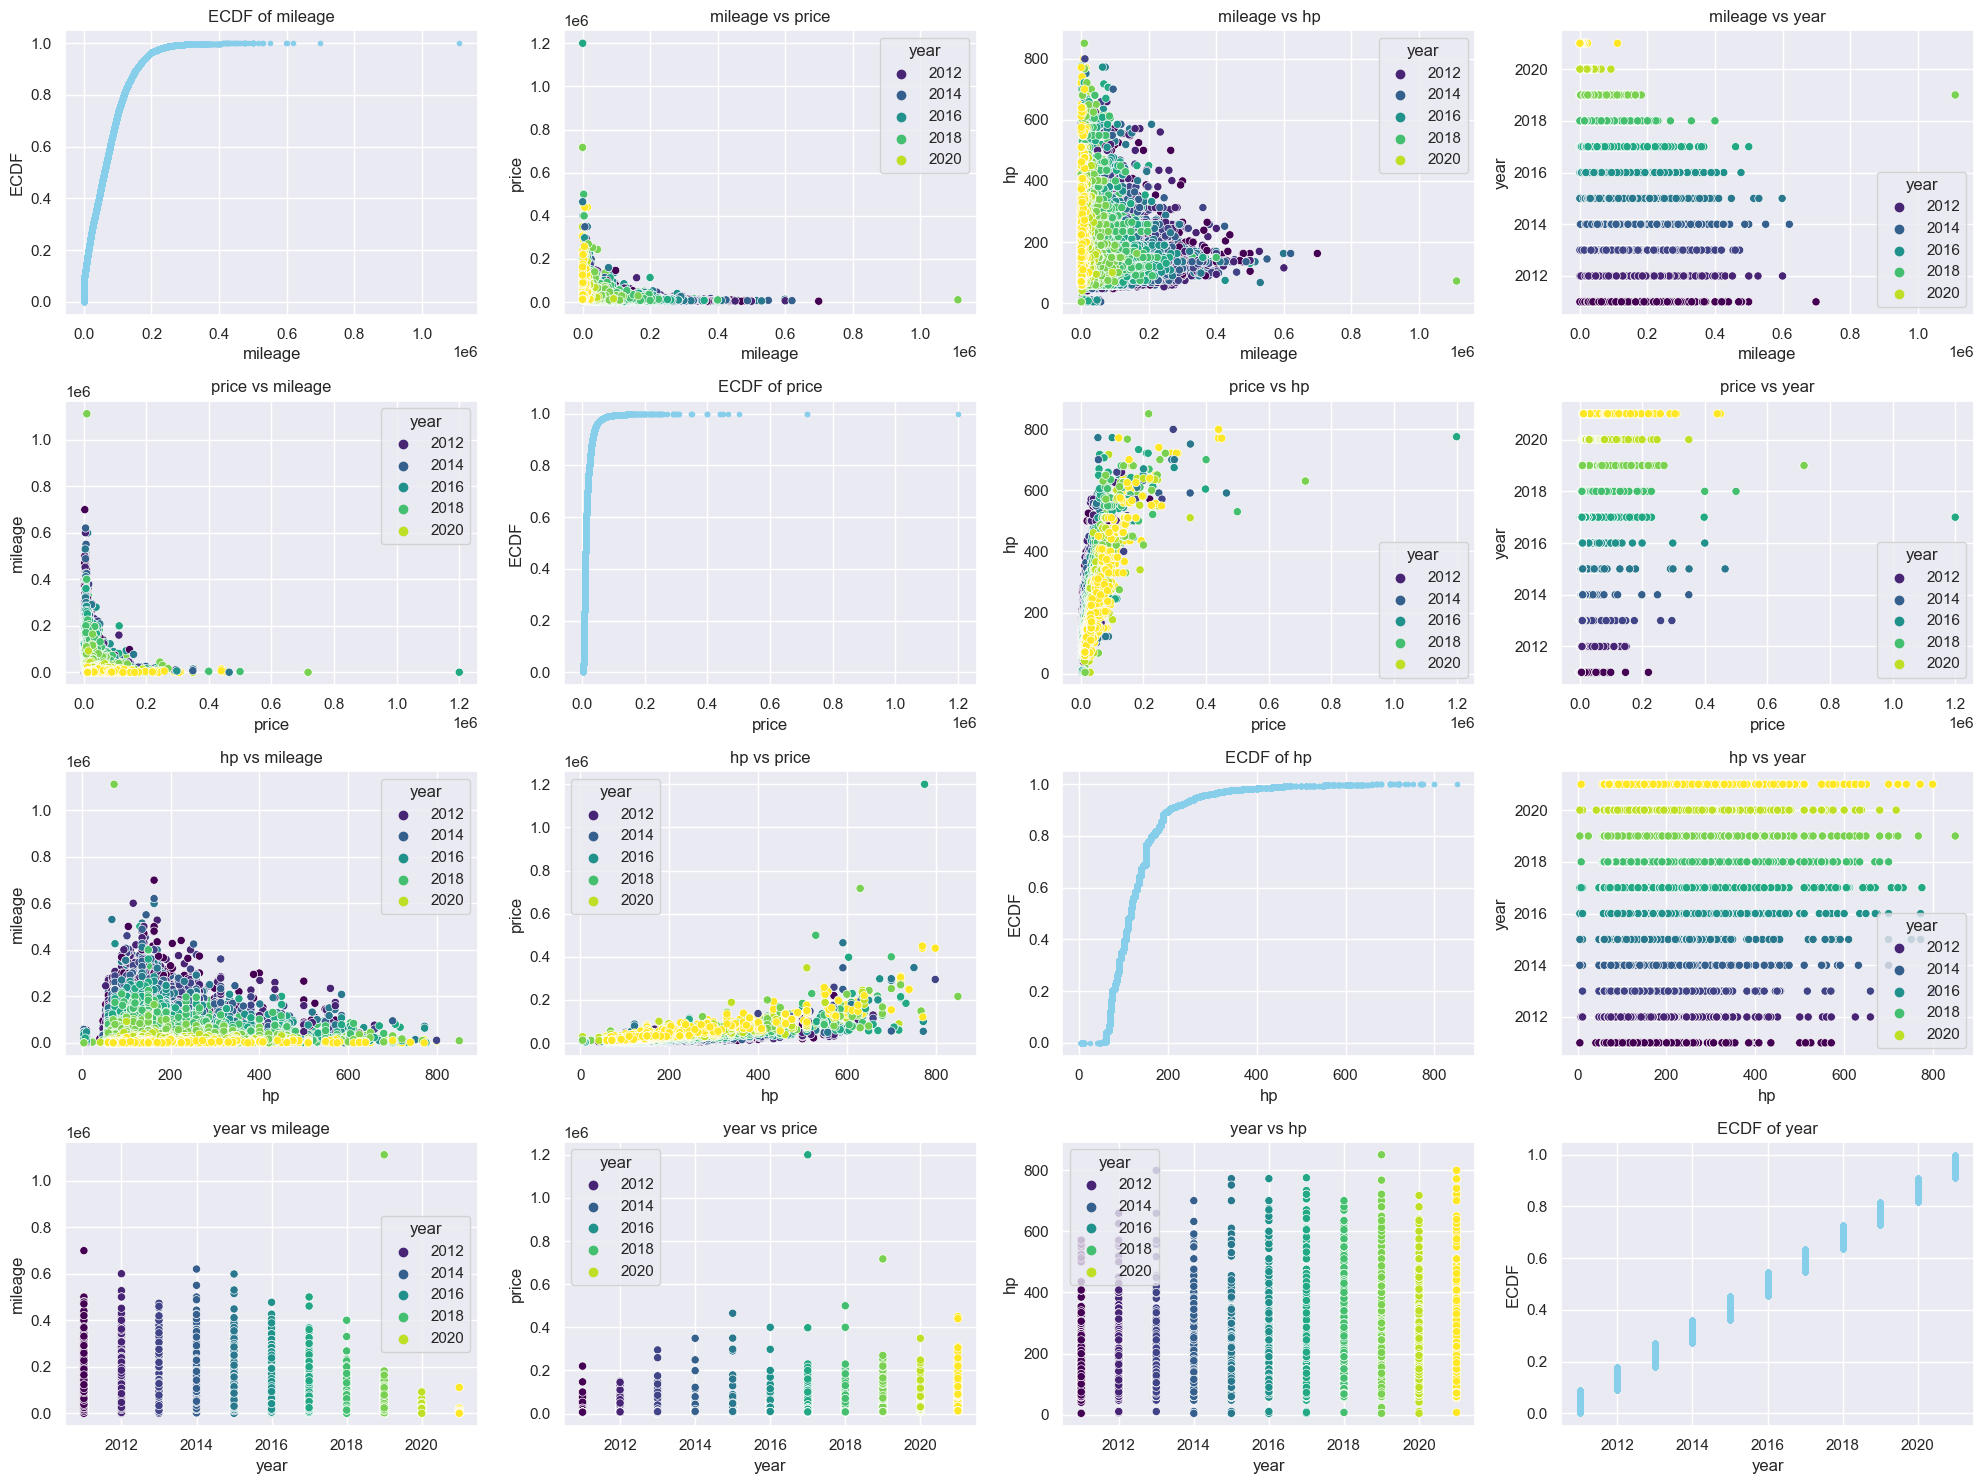

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 15))

# Liste der numerischen Features
numerical_features = ['mileage', 'price', 'hp', 'year']

def plot_ecdf(data, feature, color='skyblue'):
    """
    Plottet die empirische kumulative Verteilungsfunktion (ECDF) für ein gegebenes Feature.
    
    Args:
        data (pd.DataFrame): Der Datensatz, der das Feature enthält.
        feature (str): Der Name des Features, für das die ECDF geplottet werden soll.
        color (str): Die Farbe des ECDF-Plots.
    
    Returns:
        None
    """
    # Daten für das Feature sortieren
    x = np.sort(data[feature])
    # ECDF-Werte berechnen
    y = np.arange(1, len(x) + 1) / len(x)
    # ECDF plotten
    plt.plot(x, y, marker='.', linestyle='none', color=color)
    plt.title(f'ECDF of {feature}')
    plt.xlabel(feature)
    plt.ylabel('ECDF')

# Einstellungen für die Visualisierung
sns.set(style="darkgrid")
plt.figure(figsize=(20, 15))

# Scatterplots und ECDFs für die numerischen Features erstellen
for i, feature1 in enumerate(numerical_features):
    for j, feature2 in enumerate(numerical_features):
        plt.subplot(len(numerical_features), len(numerical_features), i*len(numerical_features) + j + 1)
        if feature1 == feature2:
            # ECDF anstelle von Histogramm, wenn beide Features identisch sind
            plot_ecdf(df, feature1)
        else:
            # Scatterplot erstellen
            sns.scatterplot(data=df, x=feature1, y=feature2, hue='year', palette='viridis', s=35)
            plt.title(f'{feature1} vs {feature2}')

plt.tight_layout()
plt.show()